# Number Prediction from image #
We need to predicte printed number on the image. we will use pixels of that particular image.

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [18]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

We have pixels of each pictures.

In [19]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [20]:
x_train.shape

# Here, we have total 60,000 data. each picture have  28*28 pixels

(60000, 28, 28)

In [21]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

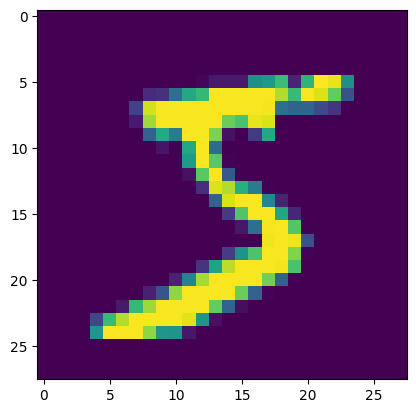

In [22]:
# Here, we are just verifying the output which is alredy given in the dataset.

import matplotlib.pyplot as plt
plt.imshow(x_train[0])

# Scaling of Data #

all the pixel values are between 0 to 255. So, here we will perform scaling to keep our data into the range of (0,1).

Here, we will devide pixel values by 255. so, we will get all the values between 0 to 1. Bcoz StandardScaler expected <= 2. But, here we have 3 dimension. If we want to use StandardScaler we need to check how can we use for 3 dimensions.

In [23]:
x_train  = x_train / 255
x_test = x_test / 255
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Data Transformation from 2D (28*28) to 1D (1,784) for one image #

In [24]:
model = Sequential()

# Flatten is used to tramform  2D data into 1D.
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu')) # Hidden Layer || output of Flatten will be input here

# softmax : if we have num_output > s1
model.add(Dense(10,activation='softmax')) # Output Layer || here number of output will be 10 bcoz number range is 0-9.

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# sparse_categorical_crossentropy v/s categorical_crossentropy #

sparse_categorical_crossentropy: no need to do one-hot encoding

categorical_crossentropy: Need to perform one-hot encoding

In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [27]:
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2880 - val_loss: 0.1527
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1289 - val_loss: 0.1202
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0880 - val_loss: 0.1015
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0651 - val_loss: 0.0965
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0501 - val_loss: 0.0887
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0397 - val_loss: 0.0861
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0298 - val_loss: 0.1021
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0238 - val_loss: 0.1102
Epoch 9/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0189 - val_loss: 0.0987
Epoch 10/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.015

In [28]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [29]:
y_pred

# Here we are not getting proper idea. So, we will identify max number of each array to find number behind the data.

array([[1.7993593e-10, 2.3936056e-13, 1.1021814e-07, ..., 9.9997240e-01,
        2.9771553e-11, 1.4647213e-08],
       [1.0822383e-10, 1.8033086e-06, 9.9999791e-01, ..., 6.6139039e-21,
        2.5691938e-07, 5.5099274e-13],
       [3.1398400e-08, 9.9957412e-01, 3.0681869e-05, ..., 1.7232353e-05,
        3.4030012e-04, 3.6185824e-08],
       ...,
       [6.8037604e-17, 6.2478066e-13, 2.5859183e-15, ..., 1.8377088e-09,
        1.7569955e-09, 1.4088792e-07],
       [4.9574880e-14, 7.2806023e-16, 6.7155227e-17, ..., 3.3016341e-12,
        4.7115098e-08, 1.3125692e-14],
       [3.8814385e-10, 6.2335841e-13, 2.8143014e-11, ..., 3.2287342e-16,
        3.4810564e-11, 1.4542661e-13]], dtype=float32)

In [30]:
y_pred_final = y_pred.argmax(axis=1)

In [31]:
y_pred_final

# Here, it is predicted that first number of out test set is 7. let's check that.

array([7, 2, 1, ..., 4, 5, 6])

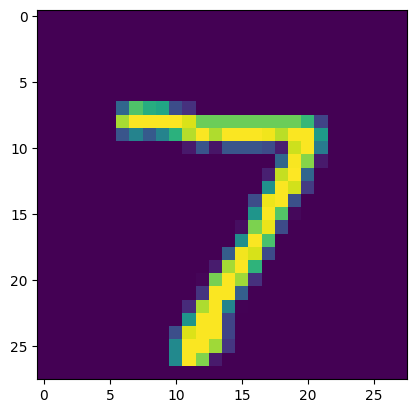

In [33]:
plt.imshow(x_test[0])

In [36]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_pred_final)

print("accuracy is: ", acc_score*100 , '%')

accuracy is:  97.50999999999999 %
